# Updated Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Global plot settings
plt.style.use('fivethirtyeight')
plt.rcParams['figure.dpi'] = 150   # Set the resolution of the plots to 150 DPI


import statsmodels.formula.api as smf  # For statistical modeling
from sklearn.metrics import mean_absolute_error, mean_squared_error

Importing datasets

In [2]:
# Load the datasets

# file paths
train_path = '/workspaces/bakery_prediction/0_DataPreparation/Split_data/01_split_data/train_data.csv'
val_path = '/workspaces/bakery_prediction/0_DataPreparation/Split_data/01_split_data/val_data.csv'
test_path = '/workspaces/bakery_prediction/0_DataPreparation/Split_data/01_split_data/test_data.csv'


# read and load the data
train_df = pd.read_csv(train_path)
val_df = pd.read_csv(val_path)
test_df = pd.read_csv(test_path)

train_df.head()

,id,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Woche,Monat,Wochentag,Feiertag,Jahreszeit,Ferien,sunny,cloudy,rainy,thunderstorm
0,1307011,2013-07-01,1,148.828353,0,6,17.8375,15,27,7,1,0,3,0,0,1,0,0
1,1307012,2013-07-01,2,535.856285,0,6,17.8375,15,27,7,1,0,3,0,0,1,0,0
2,1307013,2013-07-01,3,201.198426,0,6,17.8375,15,27,7,1,0,3,0,0,1,0,0
3,1307014,2013-07-01,4,65.890169,0,6,17.8375,15,27,7,1,0,3,0,0,1,0,0
4,1307015,2013-07-01,5,317.475875,0,6,17.8375,15,27,7,1,0,3,0,0,1,0,0


Seeing the Correlation Matrix

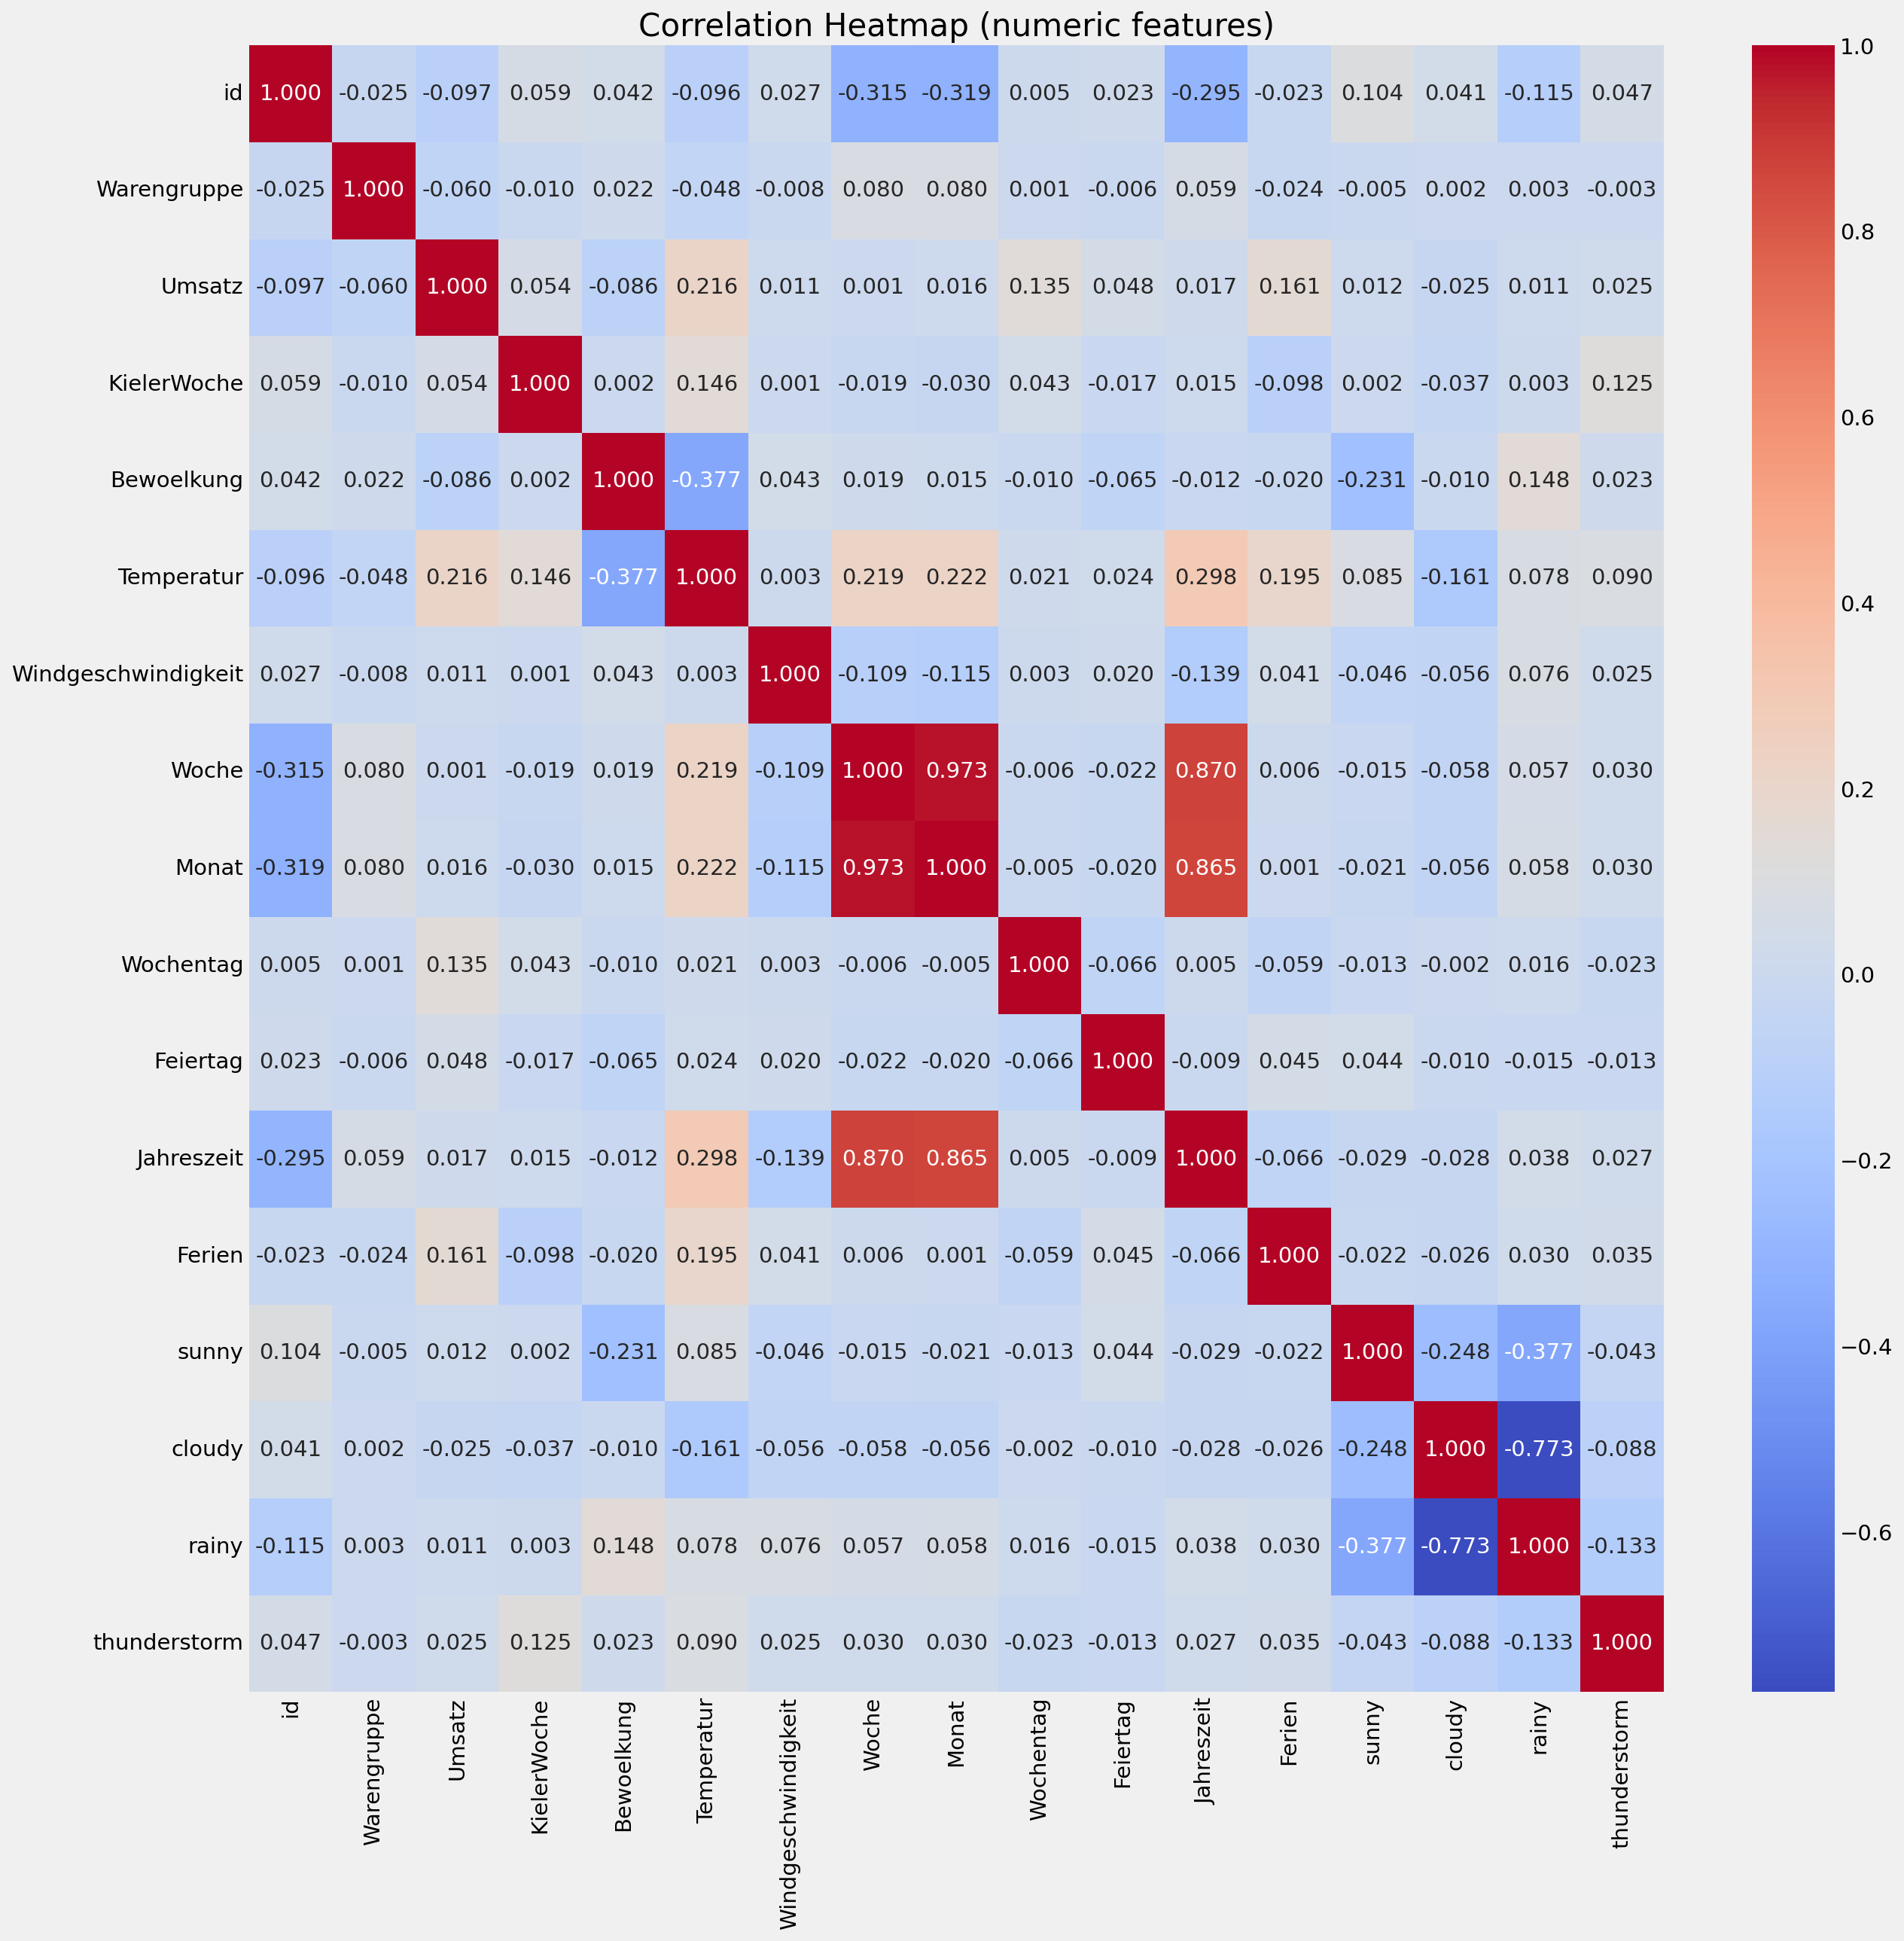

In [3]:
# The filtered data with only numerical features
df_num_feature = train_df.select_dtypes(include=[np.number])

correlation_matrix = df_num_feature.corr()

plt.figure(figsize=(18,18))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap='coolwarm')
plt.title("Correlation Heatmap (numeric features)")
plt.show()

## Initial attempt

*Numerical Vars*
- Bewoelkung
- Temperatur
- Feiertag
- Ferien
  
*Categorical Vars*
- Warengruppe
- Wochentag

*Target Var*
- Umsatz

### Preprocessing

In [4]:
# 1. Preprocessing
# Convert Datum to datetime (good practice)
train_df['Datum'] = pd.to_datetime(train_df['Datum'])
val_df['Datum'] = pd.to_datetime(val_df['Datum'])
test_df['Datum'] = pd.to_datetime(test_df['Datum'])

### Defining formula and model building

In [5]:
# 2. Define Formula
# We use C(Warengruppe) to treat it as categorical automatically.
# Other variables are treated as numerical, consistent with the previous linear model.
formula = (
    "Umsatz ~ Bewoelkung + Temperatur + Feiertag + Ferien + " 
    "C(Warengruppe) + C(Wochentag)"
)


# 3. Train Model using statsmodels.formula.api
model_smf = smf.ols(formula=formula, data=train_df).fit()

# Print Model Summary
print(model_smf.summary())

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     1356.
Date:                Thu, 04 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:49:35   Log-Likelihood:                -43143.
No. Observations:                7493   AIC:                         8.632e+04
Df Residuals:                    7477   BIC:                         8.643e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              52.3204    

  "Umsatz ~ C(Warengruppe) + KielerWoche + Bewoelkung + Temperatur + "
    "Windgeschwindigkeit + Woche + Monat + Wochentag + Feiertag + "
    "Jahreszeit + Ferien + sunny + cloudy + rainy + thunderstorm"

In [6]:
val_df.head()

,id,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Woche,Monat,Wochentag,Feiertag,Jahreszeit,Ferien,sunny,cloudy,rainy,thunderstorm
0,1708011,2017-08-01,1,166.135486,0,6,21.375,7,31,8,2,0,3,1,0,1,0,0
1,1708012,2017-08-01,2,557.470898,0,6,21.375,7,31,8,2,0,3,1,0,1,0,0
2,1708013,2017-08-01,3,294.872701,0,6,21.375,7,31,8,2,0,3,1,0,1,0,0
3,1708014,2017-08-01,4,88.208006,0,6,21.375,7,31,8,2,0,3,1,0,1,0,0
4,1708015,2017-08-01,5,325.864228,0,6,21.375,7,31,8,2,0,3,1,0,1,0,0


### Validation Evaluation with Plot


Validation MAE: 51.30
Validation RMSE: 70.33


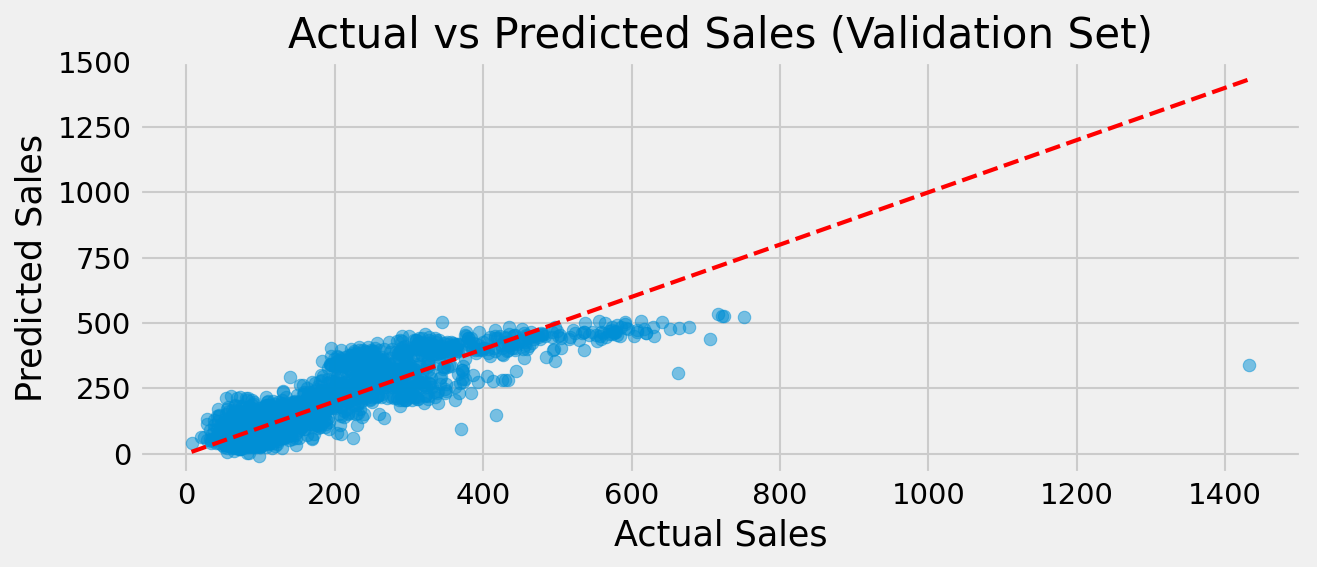

In [7]:
y_pred_val = model_smf.predict(val_df)        # prediction on validation set
y_val = val_df['Umsatz']                      # actual values
                     
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

print(f"\nValidation MAE: {mae_val:.2f}")
print(f"Validation RMSE: {rmse_val:.2f}")


# ---------- Plotting Predictions vs Actuals on Validation Set ----------

# Plots
plt.figure(figsize=(9, 4))
plt.scatter(y_val, y_pred_val, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Validation Set)')
plt.tight_layout()

### Prediction on Test Set

In [8]:
y_pred_test = model_smf.predict(test_df)  

# Clip negative predictions to 0
y_pred_test = np.maximum(y_pred_test, 0)



### Create Sample Submission File

In [9]:
# Create submission DataFrame
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'Umsatz': y_pred_test
})

# Save to CSV
submission_file_name = 'sm_linear_submission.csv'
workspace_path = "/workspaces/bakery_prediction/2_BaselineModel/01_Lin_Reg/prediction"
submission_file = workspace_path + submission_file_name

submission_df.to_csv(submission_file, index=False)

print(f"\nPredictions saved to {submission_file}")
print(submission_df.head())


Predictions saved to /workspaces/bakery_prediction/2_BaselineModel/01_Lin_Reg/predictionsm_linear_submission.csv
        id      Umsatz
0  1808011  173.186776
1  1808012  462.445737
2  1808013  215.994414
3  1808014  140.496561
4  1808015  332.741378
